In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [3]:
data = np.load('./pattern_correlation_l2_error_data/ou_gaussian_v_adap_pattern_corr_t27_to_45.npz')

In [4]:
# ou vs adapted solution; pattern correrlation
pc_vort_ou_v_ad = data['pc_vort_ou_v_ad']

# gaussian vs adapted solution; pattern correrlation
pc_vort_gauss_v_ad = data['pc_vort_gauss_v_ad']

# l2 error between ou ensemble and adapted ref. solution
l2_vel_ou_v_ad = data['l2_vel_ou_v_ad']
l2_temp_ou_v_ad = data['l2_temp_ou_v_ad']
l2_vort_ou_v_ad = data['l2_vort_ou_v_ad']

# l2 error between ou ensemble and adapted ref. solution
l2_vel_gauss_v_ad = data['l2_vel_gauss_v_ad']
l2_temp_gauss_v_ad = data['l2_temp_gauss_v_ad']
l2_vort_gauss_v_ad = data['l2_vort_gauss_v_ad']


In [5]:
pc_vort_ou_v_ad.shape, pc_vort_gauss_v_ad.shape, l2_vel_ou_v_ad.shape

((19, 50), (19, 50), (19, 50))

In [6]:
n_particles = np.shape(pc_vort_gauss_v_ad)[1]
n_tsteps = np.shape(pc_vort_gauss_v_ad)[0]
time = np.arange(n_tsteps)
print(f'total number of time steps: {n_tsteps}')
print(f'total number of particles in the ensemble: {n_particles}')

total number of time steps: 19
total number of particles in the ensemble: 50


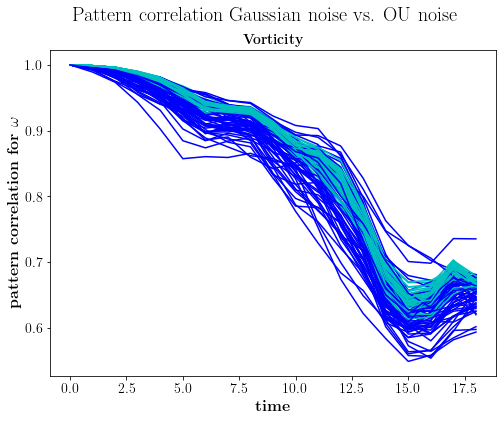

In [7]:
# plots; pattern correlation 
fig, ax = plt.subplots(figsize=(8, 6)) # one can try this also: layout="constrained"
fig.suptitle(r'Pattern correlation Gaussian noise vs. OU noise')
ax.set_title(r'\bf Vorticity')
ax.set_xlabel(r'\bf{time}')
ax.set_ylabel(r'\bf {pattern correlation for} $\omega$')
for j in range(n_particles):
    ax.plot(time,pc_vort_gauss_v_ad[:,j], color="c")
    ax.plot(time,pc_vort_ou_v_ad[:,j], color="b")
    ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)

# Mean and one standard deviation regions

In [8]:
pc_vort_ou_v_ad.shape, pc_vort_gauss_v_ad.shape

((19, 50), (19, 50))

In [9]:
# ensemble mean and one standard deviation regions for vorticity pattern correlation; OU vs adapted
pc_vort_ou_vs_ad_mean = np.mean(pc_vort_ou_v_ad, axis=1)
pc_vort_ou_vs_ad_std = np.std(pc_vort_ou_v_ad, axis=1)
pc_vort_ou_v_ad_std_plus = pc_vort_ou_vs_ad_mean + pc_vort_ou_vs_ad_std
pc_vort_ou_v_ad_std_minus = pc_vort_ou_vs_ad_mean - pc_vort_ou_vs_ad_std

pc_vort_ou_v_ad_std_minus.shape

(19,)

In [10]:
# ensemble mean and one standard deviation regions for vorticity pattern correlation; Gaussian vs adapted
pc_vort_gauss_vs_ad_mean = np.mean(pc_vort_gauss_v_ad, axis=1)
pc_vort_gauss_vs_ad_std = np.std(pc_vort_gauss_v_ad, axis=1)
pc_vort_gauss_v_ad_std_plus = pc_vort_gauss_vs_ad_mean + pc_vort_gauss_vs_ad_std
pc_vort_gauss_v_ad_std_minus = pc_vort_gauss_vs_ad_mean - pc_vort_gauss_vs_ad_std


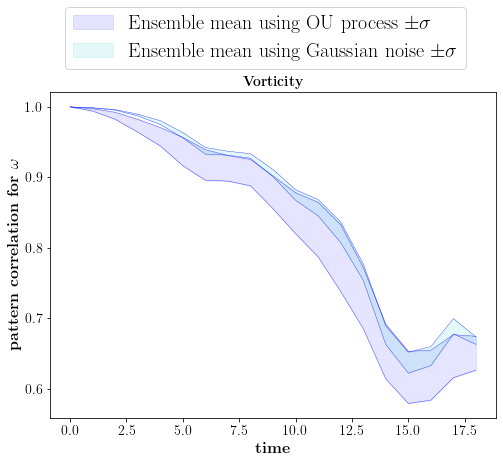

In [11]:
# plots; pattern correlation 
fig, ax = plt.subplots(figsize=(8, 6)) # one can try this also: layout="constrained"
# fig.suptitle(r'Pattern correlation Gaussian noise vs. OU noise', fontsize=16)
ax.set_title(r'\bf Vorticity')
ax.set_xlabel(r'\bf{time}')
ax.set_ylabel(r'\bf {pattern correlation for} $\omega$')
ax.plot(pc_vort_ou_v_ad_std_plus, color="blue", linewidth=0.3)
ax.plot(pc_vort_ou_v_ad_std_minus, color="blue", linewidth=0.3)
ax.fill_between(time,pc_vort_ou_v_ad_std_plus,pc_vort_ou_v_ad_std_minus, alpha=.1, color="blue", label=r'Ensemble mean using OU process $\pm \sigma$')
ax.plot(pc_vort_gauss_v_ad_std_plus, color="blue", linewidth=0.3)
ax.plot(pc_vort_gauss_v_ad_std_minus, color="blue", linewidth=0.3)
ax.fill_between(time,pc_vort_gauss_v_ad_std_plus,pc_vort_gauss_v_ad_std_minus, alpha=.1, color="c", label=r'Ensemble mean using Gaussian noise $\pm \sigma$')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=1)

THe pattern correlation plots doesn't show any advantage of OU process over Gaussian noise ! I expected to see better results for OU but i didn't see that from data analysis. 

Now i am analysis the relative $L^2$ error distances between the ensembles and adapted ref. sol.
The ensembles are generated using Guassian noise and OU process. 

In [12]:
# ensemble mean and one standard deviation regions for vorticity pattern correlation; OU vs adapted
pc_vort_ou_vs_ad_mean = np.mean(pc_vort_ou_v_ad, axis=1)
pc_vort_ou_vs_ad_std = np.std(pc_vort_ou_v_ad, axis=1)
pc_vort_ou_v_ad_std_plus = pc_vort_ou_vs_ad_mean + pc_vort_ou_vs_ad_std
pc_vort_ou_v_ad_std_minus = pc_vort_ou_vs_ad_mean - pc_vort_ou_vs_ad_std

pc_vort_ou_v_ad_std_minus.shape

(19,)

In [13]:
# ensemble mean and one standard deviation regions for relative l2 errors: OU vs adapted
## velocity 
l2_vel_ou_v_ad_mean = np.mean(l2_vel_ou_v_ad, axis=1)
l2_vel_ou_v_ad_std = np.std(l2_vel_ou_v_ad, axis=1)
l2_vel_ou_v_ad_std_plus = l2_vel_ou_v_ad_mean + l2_vel_ou_v_ad_std
l2_vel_ou_v_ad_std_minus = l2_vel_ou_v_ad_mean - l2_vel_ou_v_ad_std

## temperature
l2_temp_ou_v_ad_mean = np.mean(l2_temp_ou_v_ad, axis=1)
l2_temp_ou_v_ad_std = np.std(l2_temp_ou_v_ad, axis=1)
l2_temp_ou_v_ad_std_plus = l2_temp_ou_v_ad_mean + l2_temp_ou_v_ad_std
l2_temp_ou_v_ad_std_minus = l2_temp_ou_v_ad_mean - l2_temp_ou_v_ad_std

## vorticity
l2_vort_ou_v_ad_mean = np.mean(l2_vort_ou_v_ad, axis=1)
l2_vort_ou_v_ad_std = np.std(l2_vort_ou_v_ad, axis=1)
l2_vort_ou_v_ad_std_plus = l2_vort_ou_v_ad_mean + l2_vort_ou_v_ad_std
l2_vort_ou_v_ad_std_minus = l2_vort_ou_v_ad_mean - l2_vort_ou_v_ad_std

In [14]:
# ensemble mean and one standard deviation regions for relative l2 errors: Gaussian vs adapted
## velocity 
l2_vel_gauss_v_ad_mean = np.mean(l2_vel_gauss_v_ad, axis=1)
l2_vel_gauss_v_ad_std = np.std(l2_vel_gauss_v_ad, axis=1)
l2_vel_gauss_v_ad_std_plus = l2_vel_gauss_v_ad_mean + l2_vel_gauss_v_ad_std
l2_vel_gauss_v_ad_std_minus = l2_vel_gauss_v_ad_mean - l2_vel_gauss_v_ad_std

## temperature
l2_temp_gauss_v_ad_mean = np.mean(l2_temp_gauss_v_ad, axis=1)
l2_temp_gauss_v_ad_std = np.std(l2_temp_gauss_v_ad, axis=1)
l2_temp_gauss_v_ad_std_plus = l2_temp_gauss_v_ad_mean + l2_temp_gauss_v_ad_std
l2_temp_gauss_v_ad_std_minus = l2_temp_gauss_v_ad_mean - l2_temp_gauss_v_ad_std

## vorticity
l2_vort_gauss_v_ad_mean = np.mean(l2_vort_gauss_v_ad, axis=1)
l2_vort_gauss_v_ad_std = np.std(l2_vort_gauss_v_ad, axis=1)
l2_vort_gauss_v_ad_std_plus = l2_vort_gauss_v_ad_mean + l2_vort_gauss_v_ad_std
l2_vort_gauss_v_ad_std_minus = l2_vort_gauss_v_ad_mean - l2_vort_gauss_v_ad_std

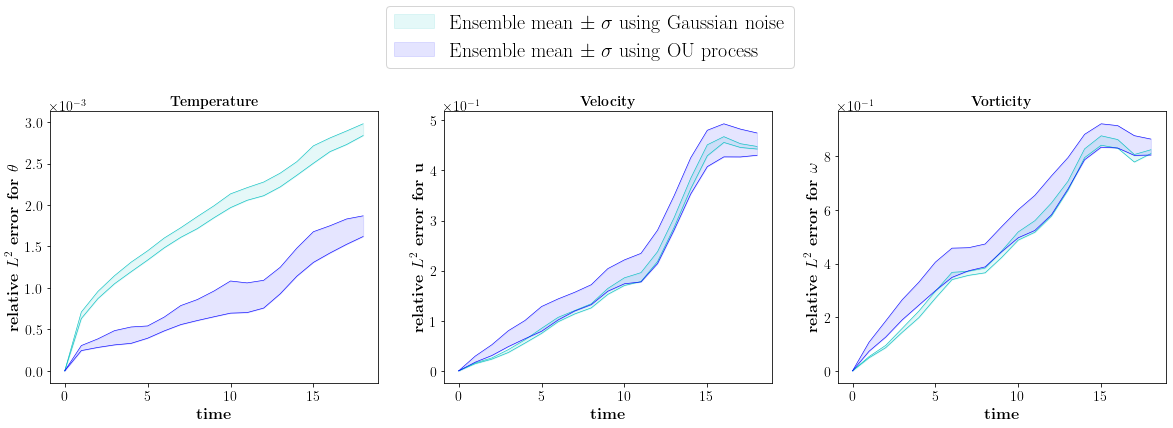

In [23]:
# plots; l2 error comparison
fig, ax = plt.subplots(1,3,figsize=(20, 5)) # one can try this also: layout="constrained"
# fig.suptitle(r'Relative $L^2$ error comparison', fontsize=16)
c1 ="c"
c2 = "b"
l_width = 0.6 # linewidth parameter
ax[0].set_title(r'\bf Temperature')
ax[0].plot(time, l2_temp_gauss_v_ad_std_plus, color=c1, linewidth=l_width)
ax[0].plot(time, l2_temp_gauss_v_ad_std_minus, color=c1, linewidth=l_width)
ax[0].fill_between(time,l2_temp_gauss_v_ad_std_minus,l2_temp_gauss_v_ad_std_plus, alpha=.1, color=c1, label=r'Ensemble mean $\pm \ \sigma$ using Gaussian noise')
ax[0].plot(time, l2_temp_ou_v_ad_std_plus, color=c2, linewidth=l_width)
ax[0].plot(time, l2_temp_ou_v_ad_std_minus, color=c2, linewidth=l_width)
ax[0].fill_between(time,l2_temp_ou_v_ad_std_minus,l2_temp_ou_v_ad_std_plus, alpha=.1, color=c2, label=r'Ensemble mean $\pm \ \sigma$ using OU process')

ax[0].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax[0].set_xlabel(r'\bf{time}')
ax[0].set_ylabel(r'\bf {relative} $L^2$ {error for} $\theta$')
# ax[0].set_xlim([0, 18]) 


ax[1].set_title(r'\bf Velocity')
ax[1].plot(time, l2_vel_gauss_v_ad_std_plus, color=c1, linewidth=l_width)
ax[1].plot(time, l2_vel_gauss_v_ad_std_minus, color=c1, linewidth=l_width)
ax[1].fill_between(time,l2_vel_gauss_v_ad_std_minus,l2_vel_gauss_v_ad_std_plus, alpha=.1, color=c1, label=r'Ensemble mean $\pm \ \sigma$ using Gaussian noise')
ax[1].plot(time, l2_vel_ou_v_ad_std_plus, color=c2, linewidth=l_width)
ax[1].plot(time, l2_vel_ou_v_ad_std_minus, color=c2, linewidth=l_width)
ax[1].fill_between(time,l2_vel_ou_v_ad_std_minus,l2_vel_ou_v_ad_std_plus, alpha=.1, color=c2, label=r'Ensemble mean $\pm \ \sigma$ using OU process')
ax[1].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax[1].set_xlabel(r'\bf{time}')
ax[1].set_ylabel(r'\bf {relative} $L^2$ {error for} $\mathbf{u}$')
# ax[1].set_xlim([0, 18]) 

ax[2].set_title(r'\bf Vorticity')
ax[2].plot(time, l2_vort_gauss_v_ad_std_plus, color=c1, linewidth=l_width)
ax[2].plot(time, l2_vort_gauss_v_ad_std_minus, color=c1, linewidth=l_width)
ax[2].fill_between(time,l2_vort_gauss_v_ad_std_minus,l2_vort_gauss_v_ad_std_plus, alpha=.1, color=c1, label=r'Ensemble mean $\pm \ \sigma$ using Gaussian noise')
ax[2].plot(time, l2_vort_ou_v_ad_std_plus, color=c2, linewidth=l_width)
ax[2].plot(time, l2_vort_ou_v_ad_std_minus, color=c2, linewidth=l_width)
ax[2].fill_between(time,l2_vort_ou_v_ad_std_minus,l2_vort_ou_v_ad_std_plus, alpha=.1, color=c2, label=r'Ensemble mean $\pm \ \sigma$ using OU process')
ax[2].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax[2].set_xlabel(r'\bf{time}')
ax[2].set_ylabel(r'\bf {relative} $L^2$ {error for} $\omega$')
# ax[2].set_xlim([0, 18]) 

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=1)
plt.savefig('../plots/ou_noise/ensemble_l2_error_comparison_ou_gaussian_vs_adap_mesh_32.pdf',bbox_inches='tight')


The $L^2$ error plots look promising ! I expected the spread for Gaussian noise (temp field) to be bigger than OU process. 
But that was not the case. Therefore i plotted all the realizations. See the next plot !

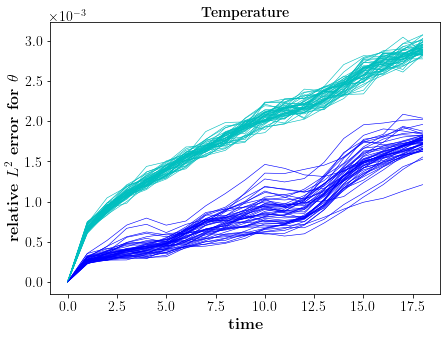

In [20]:
fig, ax = plt.subplots(figsize=(7, 5)) # one can try this also: layout="constrained"
# fig.suptitle(r'Relative $L^2$ error comparison', fontsize=16)
c1 ="c"
c2 = "b"
l_width = 0.6 # linewidth parameter
ax.set_title(r'\bf Temperature')
ax.set_xlabel(r'\bf{time}')
ax.set_ylabel(r'\bf {relative} $L^2$ {error for} $\theta$')
for j in range(n_particles):
    
    ax.plot(time, l2_temp_gauss_v_ad[:,j], color=c1, linewidth=l_width)
    ax.plot(time, l2_temp_ou_v_ad[:,j], color=c2, linewidth=l_width)
    ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
